# SI 671/721 (Fall 2020) Data Mining: Methods and Applications
**Instructor:** Paramveer Dhillon

**GSIs**: Lingyun Guo, Kwame Porter Robinson

**Homework 1:** How Far Would You Go for Italian Mozzarella? Exploring the impact of product cost and purchase frequency on distance traveled by Italian consumers

**Due:** 10.5.2020

**Total Points:** 100

# 1 Summary

We will use the supermarket dataset described in Pennacchioli et al. (2013) for this homework [1]. The dataset was obtained from one of the largest Italian retail distribution companies, _Coop_. It includes three space delimited files:
  * `supermarket_distances` A matrix of distances for customers and visited stores.
  * `supermarket_prices` A matrix of prices and products.
  * `supermarket_purchases` A transaction matrix of customers, products, visited stores, as well as the quantity of purchased products.

We will use concepts from data mining to explore interesting associations within the dataset. This exploration will support our investigation into the effects of product cost, purchase frequency on the distance traveled by Italian consumers.

We recommend that you use Jupyter notebooks and Python libraries `Pandas` and `Scipy` for this homework. We also recommend that you use`Numpy`, `Matplotlib`, `Seaborn`, and `apyori`. However, feel free to use whatever language and library that you would like.

**Your Jupyter notebook should contain for each answer a few line description of your solution or approach along with any code. Do not only submit code.**

References:

[1] Pennacchioli et al. "Explaining the product range effect in purchase data" (2013) BigData. DOI: [doi.org/10.1109/BigData.2013.6691634](https://doi.org/10.1109/BigData.2013.6691634)

# 2 Details

This homework is divided into two parts.

Part 1. Data Exploration

Part 2. Exploring product frequency, price and distance traveled

# 2.1 Part 1: Data Exploration [50 Points]
This part of the homework is designed to help you familiarize yourself with the datasets and basic concepts of itemset mining. The insights from this part of the homework will help you in Part 2 of the homework.

### 2.1.1: Better understand the _Coop_ supermarket dataset

 a) [5 points] To gain more insight into the dataset and problem motivation, please read the following: 
 *  The `Introduction` section of [Pennacchioli et al. "Explaining the product range effect in purchase data" (2013) BigData.](http://www.michelecoscia.com/wp-content/uploads/2013/09/geocoop.pdf)
 * A deeper explanation  of the [*Supermarket Data* here](http://www.michelecoscia.com/?page_id=379)
 
**Paper Overview**

>This paper  attempts to predict customer behavior when shopping to large retailers. Basically, there is a range effect. Customers are willing to travel furhter distances for certain products (less common ones). This distance effect is not driven by price nor frequency. Instead, it is driven by a sophistication metric which is a way to quantify the complex personal needs/wants that push an individual to go to a greater distance for a specific product.


b) [5 points] Download [the supermarket dataset here](http://michelecoscia.com/wp-content/uploads/2013/02/supermarket_data.zip). The dataset is ~65 megabytes big. We refer to the entire dataset as *S* or *Supermarket*. You may do this in code or manually.

**Downaloaded manually** 
> I downloaded the dataset manually into my computer from website. 

c). [13 points] Briefly describe how the files and fields in the supermarket dataset are related. For each file be sure to detail what the file generally covers and what each field represents. 

Also, the `supermarket_purchases` has a large number of rows. To reduce memory usage and future algorithmic runtime in Part 2 use a method that randomly reads in ~50% of the total rows (e.g. does not read in the entire file into memory but samples from the file as it is read); in `pandas` this would be the `skip_rows` argument to `read_csv`. Before reading in the file seed the random generator with a value of 671 (e.g. `random.seed(671)`) so that your sample is reproducible.

**Overall Description**

>There are a total of 3 datasets with data from one  of the major chain stores in Italy (Coop). This data spans from January 2007 to December 2011. The main goal of the analysis is to be able to analyze distances between customers and stores. More specifically, we want to be able to understand what products push customers to seek stores on further distances exlcuding price & frequency of purchase as motivating factors. The problem comes down to creating a sophistication metric that can aid in predicting wethere a customer will/will not go to an alternative further store. Such metric is influenced by deep complex human behaviour & can be reppresented through the concept of lift. 

**supermarket_distances**

>This dataset has total of (301830) rows. There are a total of three columns and such ones being: customer_id, shop_id & distance. Customer_id represents a specific customer that is linked with a particular membership card. Shop_id represents the specific Coop facility. Distance represents the distance between a customer & a specic Coop store.  The distance is measured in meters & in a straight line format. 

**supermarket_prices**

>This dataset has a total of 4566 rows. There are a total of two colums and such ones being: product_id & price. Product_id represents the identifier for a particular product, whereas the price reppresents the average price (in Euro) for that product. The price is reflective for the time span of the dataset. 

**supermarket_purchases**

>This dataset has a total of 24638724rows. There are a total of four columns and such ones being:
customer_id, product_id, shop_id & quantity. The customer_id, product_id & shop_id are analogous to the previoulsy described names. Quantity represents the total amount of items that the customer bought the product in that particular shop. 

In [5]:
'''
Code Description: Read files through CSV function 
'''

import pandas as pd
import numpy as np
import random
random.seed(671)
#index = np.random.randint(1, 24638723, 12319362) #50% of data (still too big for my machine)
#index= index.tolist()
#purchases = pd.read_csv('supermarket_purchases.csv',sep='\s+', skip_rows = index) , this was giving an error

distance = pd.read_csv('supermarket_distances.csv',sep='\s+')
prices= pd.read_csv('supermarket_prices.csv',sep='\s+')
purchases = pd.read_csv('supermarket_purchases.csv',sep='\s+', nrows=1231936)

#Peak of datasets
print(distance.head())
print(prices.head())
print(purchases.head())

   customer_id  shop_id     distance
0            1        1  4082.522163
1            1        2   985.876199
2            1        3  2372.096966
3            1        4  4929.804616
4            1        5  3284.386737
   product_id  price
0           1  4.130
1           2  2.189
2           3  3.349
3           4  4.682
4           5  1.615
   customer_id  product_id  shop_id  quantity
0            1         112        1         3
1            1         112        2        16
2            1         113        2         2
3            1         114        2         1
4            1         133        1         1



### 2.1.2: Exploratory Data Analysis (EDA)
(Part I, continued)

We want to better understand the data driven relationships within the dataset. To do so we will plot the distributions of key variables of interest and describe them. Some of the following questions can be answered through plots, histograms and/or pairwise plots. You may use other EDA plots and tools as desired as long as you describe what is observed and explain possible causes for what you observe. 

d) [5 points] For `supermarket_distances`, please describe the shape of the `distance` distribution; is it normal? is it bi-modal? is it skewed? Briefly speculate why or why not your description is justified.

>As the histogram below is able to show, the metric 'Distance' follows approximately a **Unimodal right skewed distribution** with a mean of: *2093.80* and a median of: *2362.70*. Now, this could be indicative that the majority of the times the customer shop around their local stores (common items (i.e food, bread, pasta)), but sometimes customers are willing to travel further distances given *complex personal needs* for more advanced products (i.e tv, coat, dvd). As a result, we get this skewed right distribution in which the majority of the shopping for basics happens near, and some of the shopping for more selective products happens at furhter stores. Finally, if we consider the left side (wrt median), we have a few customer who do not deviate much from their local stores. Perhaps, these could be old folks not too excited about experimenting with new things in their life, they're happy with bread (super speculation). 

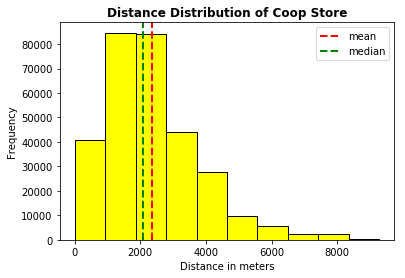

Median:  2093.80327904
Mean:  2362.7070819558767


In [4]:
'''
Code Description
-----------------
Distance:
    - Get distance measurements from dataset, compute [mean, median], and plot histogram.
'''

import matplotlib.pyplot as plt
sup_dis = distance['distance']

_= plt.hist(sup_dis,  histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Distance in meters')
_=plt.ylabel('Frequency')
_=plt.title('Distance Distribution of Coop Store', fontweight='bold')
_= plt.axvline(sup_dis.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(sup_dis.median(), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()
plt.show()
print('Median: ', sup_dis.median())
print('Mean: ', sup_dis.mean())

e) [5 points] For `supermarket_prices`, please describe the shape of the `price` distribution; is it normal? is it bi-modal? is it skewed? Briefly speculate why or why not your description is justified.

>As the histogram below is able to show, the prices follow a much more streesed **right skewed** distribution with a mean of 13.86 euro and a median of 4.06 euro. In the prices case, we have a skew that is much more apparent with 80/90 %  of products  costing between 0 -20 eruros, and a minority of products that have extreme cost (i.e >20).  Now, given that COOP is a supermarket chain, most of its products are indeed related to food. Often times, a single food product raraly surpasses the 20 euro margin (there are excpetions of course). Also, Coop offers additional products (fewer than food) outside of the food category, and these ones having higher cost skew the distribution to the right as witnessed in the histogram below.  

Median:  4.055
Mean:  13.86325574775564


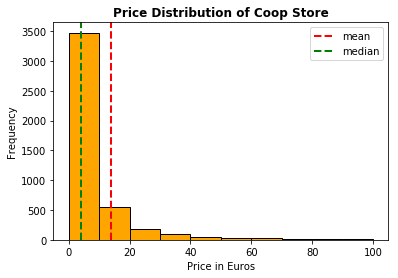

In [5]:
'''
Code Description
-----------------
Price:
    -Get price measurements from dataset,compute [mean, median], and plot histogram.
'''

import matplotlib.pyplot as plt
sup_price = prices['price']

fig, ax = plt.subplots()
_= ax.hist(sup_price, bins=10, histtype='bar', align='mid', orientation='vertical', color='orange', label=None, 
            edgecolor= 'k', range=[0,100])
_=ax.set_xlabel('Price in Euros')
_=ax.set_ylabel('Frequency')
_=ax.set_title('Price Distribution of Coop Store', fontweight='bold')
_= ax.axvline(sup_price.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
_= ax.axvline(sup_price.median(), color='green', linestyle='dashed', linewidth=2, label='median')
_=ax.legend()

print('Median: ', sup_price.median())
print('Mean: ', sup_price.mean())

plt.show()

f) [17 points] In (e) you investigated the shape of the `supermarket_prices` distribution. For efficiency purposes, first take a random sample of 10,000 customers. 

Then create a subset, $C_{lower}$, of customers for those customers that spent less than average on products. Create a subset, $C_{higher}$, of customers that spent more than average on products. 

**Does the average `distance` traveled differ across these subsets?**
> Yes, both results are extremely different. The Clower group has a mean 1719.87 meters, whereas the Chigher group
has a mean of 1539.37 meters. At first glance, these results do indeed appear different from one another. 

**Is this difference _significant_ (show your work using a 95% confidence interval)?**
>Conclusion: With a t-value of 6.40 which yields a p-value of ~0, with a 95% confidence interval we can conclude that
the results are statistically significant. Hence, the two means are (statistically) different. 

**In your answer include why or why not your explanation is justified.**
> I was expecting the distance to be higher for products that are higher than average purchases. Instead, I've gotten the opposite trend- products in Clower tend to have a higher distance than products in Chigher. The reason for such results could be a) I have caluclated the 'average' wrong. I have retried this problem quite a few times and updated my solution a fair  amount  of times according to piazza/GSI help. Hence, it wouldn't surprise me to have gotten this wrong; b) customers might be purchasing primary products in multiple locations driving the average distance high. The results could be indeed reflective of a plausible (but unlikely) scenario.

In [6]:
'''
Code Description
------------------
Random Sample
    - Generate a list of index from 0 to 1231935 (total # of observations in dataset)
    - Shuffle  (this gives a random order)
    - Take only first 10,000 elements (this will be in random order)
    
Average spent by each customer
    - Loop over each customer (customer_id)
    - Loop over every product purchased by customer (product_id)
        - get the price (price*quantity)
            - Append price to a temp list (repeeat for all products)
        - Take average, and append to final list  (my_prices)
    - Final list has the average purchase by each customer, taking the mean of this gives us the cut point to create 
      Clower/Chigher

Assign Clower/Chigher
    - Once again loop over each customer in the dataset, find out their average purchase as in the previous step
    - Find out whether they've spend more or less than the average/typical purchase
    - Create a new column in dataset (Cgroup)
    - Assing to Clower if customer's average purchase is smaller than the typical purchase
    - Assing to Chighger if customer's average purchase is higher than the typical purchase
    
Distance 
    - Loop over each observation in Clower/Chigher
    - Get distance of each purchase (customer_id, shop_id)
    - Append distance to Clower/Chigher list 
    
T test
    - Compare Clower/Chigher data if different through scipy library
'''

import numpy as np
import random
random.seed(671)

#Get random indexs
my_random = list(range(0,1231935))        
random.shuffle(my_random)
index= sorted(my_random[0:10000])

#Subset of 10,000
my_purchases = purchases[purchases.index.isin(index)]

#All customer
my_customers = sorted(set(my_purchases['customer_id']))

my_prices = []
#Check each customer's purchases
for x in my_customers:
    #Items purchased by customer x
    current_cust = my_purchases[my_purchases['customer_id'] == x]
    temp_price = []
    
    #Find average of each product purchased  by customer X
    x_products = sorted(set(current_cust['product_id']))
    
    for y in x_products:
        #Subset of all prodcuts having id == y
        x_cust_x_product= current_cust[current_cust['product_id']==y]
        
        #Iterate over all rows of the same product, get price (price* quantity)
        for index, row in x_cust_x_product.iterrows():
            price= float(prices[prices['product_id'] == row['product_id']]['price'])*row['quantity']
            temp_price.append(price)
            
    #Average (total/unique products)
    my_prices.append(np.mean(temp_price))          

In [7]:
import warnings
warnings.filterwarnings("ignore")

my_purchases['Cgroup']=0
#Assign Customer to Clower or Chigher
#Check each customer's purchases
for x in my_customers:
    #Items purchased by customer x
    current_cust = my_purchases[my_purchases['customer_id'] == x]
    temp_price = []
    
    #Find average of each product purchased  by customer X
    x_products = sorted(set(current_cust['product_id']))
    
    for y in x_products:
        #Subset of all prodcuts having id == y
        x_cust_x_product= current_cust[current_cust['product_id']==y]
        
        #Iterate over all rows of the same product, get price (price* quantity)
        for index, row in x_cust_x_product.iterrows():
            price= float(prices[prices['product_id'] == row['product_id']]['price'])*row['quantity']
            temp_price.append(price)
            
    #Average (total/unique products)
    average = (np.mean((temp_price)))

    #Assign to Clower/Chigher
    if(average<np.mean(my_prices)):
        my_purchases.loc[my_purchases.customer_id == x, 'Cgroup'] = 'lower'
    else:
         my_purchases.loc[my_purchases.customer_id == x, 'Cgroup'] = 'higher'
my_purchases.head(10)

,customer_id,product_id,shop_id,quantity,Cgroup
3,1,114,2,1,lower
27,1,335,2,1,lower
170,1,1654,1,2,lower
268,1,2019,2,5,lower
301,1,2258,2,1,lower
413,1,3188,2,1,lower
975,2,2779,5,1,lower
998,2,2801,5,15,lower
1022,2,2997,5,2,lower
1323,3,1115,1,1,lower


In [8]:
#Distance
Clower= my_purchases[my_purchases['Cgroup']=='lower']
Chigher= my_purchases[my_purchases['Cgroup']=='higher']

#Find distance 
Clower_distance = []

#Iterate over all rows of the same product, get distance, compute average
for index, row in Clower.iterrows():
    i=row['customer_id']
    j= row['shop_id']
            
    #Locate distance for product, from customer & shop_id
    temp_dist = float(distance[(distance.customer_id == i) & (distance.shop_id== j)]['distance'])
            
    #Average distance 
    Clower_distance.append(temp_dist) 

In [9]:
Chigher_distance = []
#Iterate over all rows of the same product, get distance, compute average
for index, row in Chigher.iterrows():
    i=row['customer_id']
    j= row['shop_id']
            
    #Locate distance for product, from customer & shop_id
    temp_dist = float(distance[(distance.customer_id == i) & (distance.shop_id== j)]['distance'])
            
    #Average distance of top 20 products by customer x
    Chigher_distance.append(temp_dist) 


In [10]:
from scipy import stats
#Does the average distance traveled differ across these subsets? 
'''At first glance, these results do indeed appear different from one another. '''

print('Clower mean: ', np.mean(Clower_distance))
print('Chigher mean: ', np.mean(Chigher_distance))

#T-test with scipy (show your work using a 95% confidence interval)
''' Independent Samples t-test given we want to determine whther two means are statistically significant different
    Confidence Level = 95% , Alpha = 0.05 
    
    mu1 = Clower group
    mu2 = Chigher group
    
    H0: mu1 = mu2
    HA: mu1 != mu2 (i.e the two means are significantly different)
    
    t-stat: (mu1 - mu2)/ Sqrt( S1^2/n1 +S2^2/n2)
            S^2 = sum(x-Mu)/n-1
    
    p-value: probability of getting a result as extreme as the observed.    
'''
t2, p2 = stats.ttest_ind(Clower_distance,Chigher_distance)
print("t-value = " + str(t2))
print("p-value = " + str(p2))


#Is this difference significant?
'''Conclusion: With a t-value of 6.39 which yields a p-value of ~0, with a 95% confidence interval we can conclude that the results are statistically significant. Hence, the two means are (statistically) different.'''

Clower mean:  1719.8685615764716
Chigher mean:  1539.3669319202975
t-value = 6.296246177182384
p-value = 3.177502304559135e-10


'Conclusion: With a t-value of 6.39 which yields a p-value of ~0, with a 95% confidence interval we can conclude that the results are statistically significant. Hence, the two means are (statistically) different.'


**The main deliverable** for this part of the homework is 1) a step-by-step exploration and answers within a Jupyter Notebook, 2) a PDF document containing the answers to each of the questions above (this can be a PDF version of your Jupyter notebook).

# 2.2 Part 2: Applying Itemset Mining [50 Points]

For this part of the homework you will use itemset mining techniques to explore various relationships to the distance traveled by customers. Using the "language" of these data mining techniques to describe and justify patterns observed in a dataset is one of the primary contributions a data scientist can make in industry.

a) [6 Points] For all products sold what are the top 20 most frequent products?

> **ITEM_ID, FREQUENCY**  [(112, 88012), (2098, 82311), (2358, 79597), (1645, 75834), (1669, 60061), (1930, 59663), (1234, 53785), (2096, 52469), (2824, 52413), (355, 48774), (2114, 45371), (3041, 43063), (2831, 40424), (710, 36659), (363, 36535), (2355, 35034), (2649, 34777), (1654, 34759), (2033, 33261), (1240, 32084)]

In [29]:
'''
Code Description
------------------

Find top 20 most frequent prodcuts:
    - Create a dictionary with keys(product_id) & values (frequency_sold)
    - Sort dictionary based on values (high values, means high frequency)
    - Get the top 20 values from the sorted dictionary
    - Match values to ids    
'''
#Create a dictionary with keys: product_id & values frequency_sold
purchases.head()
my_dict = dict()
for x in range(len(purchases)):
    y= purchases.iloc[x,1]
    if(y in my_dict.keys()):
        my_dict[y] += purchases.iloc[x,3]
    else:
        my_dict[y] = purchases.iloc[x,3]

#Sort dict based on values (i.e. most_frequent)
sorted_values= sorted(my_dict.values(), reverse = True)

#Top 20 frequent 
top_20_frequency = []
for x in range(20):
    top_20_frequency.append(sorted_values[x])

#Match ID to item frequency 
top_20_id_freq= []
for x in top_20_frequency:
    for item_id, freq in my_dict.items(): 
        if freq == x:
            temp = (item_id,x)
            top_20_id_freq.append(temp)

print("ITEM_ID, FREQUENCY ", top_20_id_freq)

ITEM_ID, FREQUENCY  [(112, 88012), (2098, 82311), (2358, 79597), (1645, 75834), (1669, 60061), (1930, 59663), (1234, 53785), (2096, 52469), (2824, 52413), (355, 48774), (2114, 45371), (3041, 43063), (2831, 40424), (710, 36659), (363, 36535), (2355, 35034), (2649, 34777), (1654, 34759), (2033, 33261), (1240, 32084)]


b) [12 Points] Each top 20 product was brought by a set of customers. 

**What is the average distance traveled to the top 20 products by customers (that is, people traveled to get the top 20 products, how much did they travel on average)?**

> The average distance traveled to the top 20 products by customers is 1677.76 meters.

**What is the average distance traveled to all other products not in the top 20?**
> The average distance traveled to all other products not in the top 20  is 1660.07

**Is there a difference?**
> The difference seems minimal with a difference of ~17 meters. 

**Is it a signicant difference?**
> With a t-value of 3.21 which yields a p-value of ~0.001, with a 95% confidence interval we can conclude that the results are statistically significant. Hence, the two means are (statistically) different.



In [30]:
'''
Code Description
------------------
Average Distance top 20:
    - Subset data, so that only items with product_id in top 20 is present (top_20_purchase)
    - To find the distance, iterate over all products match customer_id to shop_id 
        - append result to list (top_20_average)
    - Take average of list (top_20_average) to find average traveled distance
    - Plot hist of top_20_average for a graphical viz
    
Average Distance bottom 80:
    - Subset data, so that only items not in top 20 is present (bottom_80_purchase)
    - To find the distance, iterate over all products match customer_id to shop_id 
        - append result to list (bottom_80_average)
    - Take average of list (bottom_80_average) to find average traveled distance
    - Plot hist of bottom_80_average for a graphical viz

T test:
    - Compare top_20_average/bottom_80_average data if different by using scipy t test function
'''
#Get ID of top 20 items
top_20_id = []
for x in top_20_id_freq:
    a, b = x
    top_20_id.append(a)
    
#Reduce purchase dataset to only top 20 products
top_20_purchase = purchases[purchases['product_id'].isin(top_20_id)]

top_20_average = []

#Iterate over all rows of the same product, get distance, compute average
for index, row in top_20_purchase.iterrows():
    i=row['customer_id']
    j= row['shop_id']
            
    #Locate distance for product, from customer & shop_id
    temp_dist = float(distance[(distance.customer_id == i) & (distance.shop_id== j)]['distance'])
            
    #Average distance of top 20 products by customer x
    top_20_average.append(temp_dist) 

Mean:  1677.7632169946894
Median:  1432.7007877


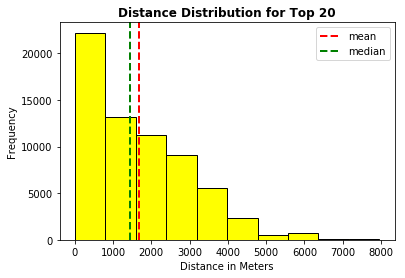

In [33]:
fig, ax = plt.subplots()
_= ax.hist(top_20_average, histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, 
            edgecolor= 'k')
_=ax.set_xlabel('Distance in Meters')
_=ax.set_ylabel('Frequency')
_=ax.set_title('Distance Distribution for Top 20', fontweight='bold')
_= ax.axvline(np.mean(top_20_average), color='red', linestyle='dashed', linewidth=2, label='mean')
_= ax.axvline(np.median(top_20_average), color='green', linestyle='dashed', linewidth=2, label='median')
_=ax.legend()

print('Mean: ', np.mean(top_20_average))
print('Median: ', np.median(top_20_average))
plt.show()

In [20]:
import time
import warnings
from tqdm import tqdm_notebook as tqdm
warnings.simplefilter("ignore")

#Reduce purchase dataset NOT in top 20 products
bottom_80_purchase = purchases[~purchases['product_id'].isin(top_20_id)]

bottom_80_average = []

#Iterate over all rows of the same product, get distance, compute average
for index, row in bottom_80_purchase.iterrows():
    i=row['customer_id']
    j= row['shop_id']
            
    #Locate distance for product, from customer & shop_id
    temp_dist = float(distance[(distance.customer_id == i) & (distance.shop_id== j)]['distance'])
            
    #Average distance of top 20 products by customer x
    bottom_80_average.append(temp_dist)

# #Alternative code to calculate distance (same results)
# def calculate_distance(row):
#     i=row['customer_id']
#     j= row['shop_id']
            
#     #Locate distance for product, from customer & shop_id
#     temp_dist = float(distance[(distance.customer_id == i) & (distance.shop_id== j)]['distance'])
#     return temp_dist

# top_20_purchase['distance'] = top_20_purchase.apply(calculate_distance, axis=1)
# bottom_80_purchase['distance'] = bottom_80_purchase.apply(calculate_distance, axis=1)

# print('Mean: ', np.mean(bottom_80_purchase['distance']))
# print('Median: ', np.median(bottom_80_purchase['distance']))

# #Mean:  1660.0743626826954
# #Median:  1386.15145014

Mean:  1660.0743626826954
Median:  1386.15145014


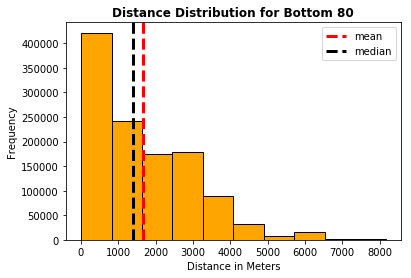

In [202]:
fig, ax = plt.subplots()
_= ax.hist(bottom_80_average, histtype='bar', align='mid', orientation='vertical', color='orange', label=None, 
            edgecolor= 'k')
_=ax.set_xlabel('Distance in Meters')
_=ax.set_ylabel('Frequency')
_=ax.set_title('Distance Distribution for Bottom 80', fontweight='bold')
_= ax.axvline(np.mean(bottom_80_average), color='red', linestyle='dashed', linewidth=3, label='mean')
_= ax.axvline(np.median(bottom_80_average), color='black', linestyle='dashed', linewidth=3, label='median')
_=ax.legend()

print('Mean: ', np.mean(bottom_80_average))
print('Median: ', np.median(bottom_80_average))
plt.show()

In [200]:
#Is this difference significant?
'''Conclusion: With a t-value of 3.21 which yields a p-value of ~0.001, with a 95% confidence interval we can conclude that
the results are statistically significant. Hence, the two means are (statistically) different.
'''
t2, p2 = stats.ttest_ind(top_20_average,bottom_80_average) 
print('T-test')
print("t-value = " + str(t2))
print("p-value = " + str(p2))

T-test
t-value = 3.2132249786227027
p-value = 0.0013125680762955793


c) [6 Points] In itemset mining why would we ignore very high selling products that are readily available, like `toothbrush`? Are high selling, easily available products likely to yield high confidence and high interest association rules?

> In data mining, often times we are intereseted in frequent items given that frequent items make a determinate pattern easier to be found & a frequent pattern by definition is bound to affect a good part of the population (generalize results). The way we measure this frequency is through metrics such as <u>*SUPPORT*</u> & <u>*CONFIDENCE*</u>. Generally, high support & high confidence are a measure of high item frequency. Now, when we are looking at frequent items, we are interested only on findings that are non-trivial (i.e people with beards love ice-cream, people w/o beards hate icecream). Unfortunately, when we are looking for frequent items, we encounter as well *common* items that are manily necessities of life rather than <u>*trivial*</u>. These items appear because they have HIGH confidence as well. Hence, high confidence items will produce set/rules that are trivial and uninteresting. As a result, we need metrics that allows us to look for items that are frequent AND not trivial/common. A good metric is Interest. 

d) [6 points] Referring to Part 1,

**For $C_{lower}$ customers what are the top 20 most frequent products?**
> [**ITEM_ID**, **FREQUENCY**] [(112, 247), (2019, 198), (2785, 170), (1645, 159), (3896, 150), (115, 145), (2824, 138), (1654, 137), (3062, 130), (1930, 125), (2098, 123), (521, 113), (1669, 110), (1677, 109), (149, 104), (2777, 103), (380, 102), (1979, 94), (2797, 94), (1660, 94), (1979, 94), (2797, 94), (1660, 94), (1979, 94), (2797, 94), (1660, 94)]

**For $C_{higher}$ customers what are the top 20 most frequent products?**
> [**ITEM_ID**, **FREQUENCY**][(2358, 680), (2114, 531), (2098, 529), (2818, 510), (364, 392), (1654, 370), (3511, 343), (2096, 338), (2028, 335), (1234, 319), (1669, 312), (521, 300), (1665, 288), (363, 283), (3041, 279), (2649, 272), (1645, 270), (443, 269), (1930, 266), (1241, 262)]



In [34]:
'''
Code Description
------------------
Clower Top 20:
    - Create a dictionary with keys(product_id) & values (frequency_sold)
    - Sort dictionary based on values (high values, means high frequency)
    - Get the top 20 values from the sorted dictionary
    - Match values to ids    

Chigher Top 20:
    - Create a dictionary with keys(product_id) & values (frequency_sold)
    - Sort dictionary based on values (high values, means high frequency)
    - Get the top 20 values from the sorted dictionary
    - Match values to ids 

'''
#Create a dictionary with keys: product_id & values frequency_sold
Clower_dict = dict()
for x in range(len(Clower)):
    y= Clower.iloc[x,1]
    if(y in Clower_dict.keys()):
        Clower_dict[y] += Clower.iloc[x,3]
    else:
        Clower_dict[y] = Clower.iloc[x,3]

#Sort dict based on values (i.e. most_frequent)
sorted_Clower= sorted(Clower_dict.values(), reverse = True)

#Top 20 frequent 
top_20_Clower = []
for x in range(20):
    top_20_Clower.append(sorted_Clower[x])

#Match ID to item frequency 
top_20_id_freq_Clower= []
for x in top_20_Clower:
    for item_id, freq in Clower_dict.items(): 
        if freq == x:
            temp = (item_id,x)
            top_20_id_freq_Clower.append(temp)

print("ITEM_ID, FREQUENCY ", top_20_id_freq_Clower)

ITEM_ID, FREQUENCY  [(112, 247), (2019, 198), (2785, 170), (1645, 159), (3896, 150), (115, 145), (2824, 139), (1654, 137), (3062, 136), (1930, 125), (2098, 123), (521, 113), (1669, 110), (1677, 109), (149, 104), (2777, 103), (380, 102), (1979, 94), (2797, 94), (1660, 94), (355, 94), (1979, 94), (2797, 94), (1660, 94), (355, 94), (1979, 94), (2797, 94), (1660, 94), (355, 94)]


In [37]:
#Create a dictionary with keys: product_id & values frequency_sold
Chigher_dict = dict()
for x in range(len(Chigher)):
    y= Chigher.iloc[x,1]
    if(y in Chigher_dict.keys()):
        Chigher_dict[y] += Chigher.iloc[x,3]
    else:
        Chigher_dict[y] = Chigher.iloc[x,3]
    
#Sort dict based on values (i.e. most_frequent)
sorted_Chigher= sorted(Chigher_dict.values(), reverse = True)

#Top 20 frequent 
top_20_Chigher = []
for x in range(20):
    top_20_Chigher.append(sorted_Chigher[x])

#Match ID to item frequency 
top_20_id_freq_Chigher= []
for x in top_20_Chigher:
    for item_id, freq in Chigher_dict.items(): 
        if freq == x:
            temp = (item_id,x)
            top_20_id_freq_Chigher.append(temp)

print("ITEM_ID, FREQUENCY ", top_20_id_freq_Chigher)

ITEM_ID, FREQUENCY  [(2358, 680), (2114, 531), (2098, 529), (2818, 510), (364, 392), (1654, 370), (3511, 343), (2096, 338), (2028, 335), (1234, 319), (1669, 312), (521, 300), (1665, 288), (363, 283), (3041, 279), (2649, 272), (1645, 270), (443, 269), (1930, 266), (1241, 262)]


e) [20 points total] Imagine that _Coop_ wants to negotiate a better deal from its suppliers. To argue for a better deal, Coop wants to ask for bulk discounts on _groups_ of products. Coop only cares about the top 5 products sold by quantity found in 2(d) above.

To help justify what groups of products should be considered Coop has asked you:

 * [worth 7 points] For $C_{lower}$ customers, using the Apriori algorithm, what are the most frequent itemsets that are purchased from stores? For computational efficiency only run the algorithm on data containing the products in $C_{lower}$'s top 5 most frequently sold products.
 
> **Total rules:  31** 
Rule  1 :  [2785, 2019, 1645, 112, 3896]
Rule  2 :  [3896, 2785, 2019, 1645]
Rule  3 :  [112, 2785, 3896, 2019]
Rule  4 :  [112, 2785, 3896, 1645]
Rule  5 :  [112, 3896, 2019, 1645]
Rule  6 :  [112, 2785, 2019, 1645]
Rule  7 :  [3896, 2785, 2019]
Rule  8 :  [3896, 2785, 1645]
Rule  9 :  [3896, 2019, 1645]
Rule  10 :  [2785, 2019, 1645]
Rule  11 :  [112, 2785, 3896]
Rule  12 :  [112, 3896, 2019]
Rule  13 :  [112, 2785, 2019]
Rule  14 :  [112, 3896, 1645]
Rule  15 :  [112, 2785, 1645]
Rule  16 :  [112, 2019, 1645]
Rule  17 :  [3896, 2785]
Rule  18 :  [3896, 2019]
Rule  19 :  [2785, 2019]
Rule  20 :  [3896, 1645]
Rule  21 :  [2785, 1645]
Rule  22 :  [2019, 1645]
Rule  23 :  [112, 3896]
Rule  24 :  [112, 2785]
Rule  25 :  [112, 2019]
Rule  26 :  [112, 1645]
Rule  27 :  [3896]
Rule  28 :  [2785]
Rule  29 :  [2019]
Rule  30 :  [1645]
Rule  31 :  [112]


 * [worth 7 points] For $C_{higher}$ customers, using and Apriori algorithm, what are the most frequent itemsets that are purchased from stores? For computational efficiency only run the algorithm on data containing the products in $C_{higher}$'s top 5 most frequently sold products.
 
> **Total rules:  22**
Rule  1 :  [2098, 2818, 2114, 2358]
Rule  2 :  [2098, 364, 2114, 2358]
Rule  3 :  [2114, 2818, 2358]
Rule  4 :  [2098, 2818, 2358]
Rule  5 :  [2098, 2818, 2114]
Rule  6 :  [2098, 2114, 2358]
Rule  7 :  [2114, 364, 2358]
Rule  8 :  [2098, 364, 2358]
Rule  9 :  [2098, 364, 2114]
Rule  10 :  [2818, 2358]
Rule  11 :  [2114, 2818]
Rule  12 :  [2114, 2358]
Rule  13 :  [2098, 2818]
Rule  14 :  [2098, 2358]
Rule  15 :  [2098, 2114]
Rule  16 :  [364, 2358]
Rule  17 :  [2114, 364]
Rule  18 :  [2098, 364]
Rule  19 :  [2358]
Rule  20 :  [2114]
Rule  21 :  [2098]
Rule  22 :  [364] 

 * [worth 6 points] Computer similarity between the $C_{lower}$ and $C_{higher}$ itemsets using Jaccard similarity. Compare only itemsets in the top 20 ranked by confidence. Are there any itemsets have a Jaccard similarity above 0?

> No itemsets have a Jaccardd similarity above 0, which does indeed make sense- none of the Clower/Chiger datasets contain products from the other (i.e. no products in common).
 
The apriori algorithm parameters should be set to: `min_confidence=0.50`, `min_lift=1.0` and `max_length=5`


#### Apriori, $C_{lower}$

In [38]:
'''
Code Description
------------------
Clower top 5
    - Find top 5 most sold in Clower (simply take first 5 elments from top 20 of previous problem)
    - Subset data, such that only the products of Clower containing top 5 product Id are considered
    - Index subset data by shop id
    - Create list of list for apriori input (this code was taken from Piazza- thank you!)
    - Run apriori alogorithm, get rules, display 
    
CHigher top 5
    - Find top 5 most sold in Chigher (simply take first 5 elments from top 20 of previous problem)
    - Subset data, such that only the products of Chigher containing top 5 product Id are considered
    - Index subset data by shop id
    - Create list of list for apriori input (this code was taken from Piazza- thank you!)
    - Run apriori alogorithm, get rules, display 
    
Jaccard Similarity:
    - Unpack apriori object & convert to pandas dataframe (get itemset & Confidence)
        - Loop through each rule
            - Loop through each component present in rule (get cofidence)
    - Sort dataset by confidence & get only top 20 observations
    - Calculate Jaccard similarity for top20 Clower/Chigher 
        - Compare each element in top20 Clower with each element of top 20 Chigher (intersection/union)
'''
#APRIORI
from apyori import apriori
my = Clower[['product_id','shop_id']]

top_5_Clower = []
for x in range(5):
    z = top_20_id_freq_Clower[x]
    a,b = z
    top_5_Clower.append(a)

my = my[my['product_id'].isin(top_5_Clower)]
my.set_index('shop_id', inplace=True)

my.sort_index(inplace=True)
my_C_lower_top_5_product_ids = my
c_lower_itemsets= [ set(my_C_lower_top_5_product_ids.loc[shop_id_index].values.flatten()) for shop_id_index in my_C_lower_top_5_product_ids.index]

association_rules = apriori(c_lower_itemsets, min_confidence=0.50, min_lift=1.0, max_length=5)
association_results = list(association_rules)

# for x in range(20):
#     print(association_results[x])
listRules = [list(association_results[i][0]) for i in range(0,len(association_results))]
listRules.reverse()
print('Total rules: ',len(listRules))
for x in range(31):
    print('Rule ',x+1, ": ",listRules[x])

Total rules:  31
Rule  1 :  [2785, 2019, 1645, 112, 3896]
Rule  2 :  [3896, 2785, 2019, 1645]
Rule  3 :  [112, 2785, 3896, 2019]
Rule  4 :  [112, 2785, 3896, 1645]
Rule  5 :  [112, 3896, 2019, 1645]
Rule  6 :  [112, 2785, 2019, 1645]
Rule  7 :  [3896, 2785, 2019]
Rule  8 :  [3896, 2785, 1645]
Rule  9 :  [3896, 2019, 1645]
Rule  10 :  [2785, 2019, 1645]
Rule  11 :  [112, 2785, 3896]
Rule  12 :  [112, 3896, 2019]
Rule  13 :  [112, 2785, 2019]
Rule  14 :  [112, 3896, 1645]
Rule  15 :  [112, 2785, 1645]
Rule  16 :  [112, 2019, 1645]
Rule  17 :  [3896, 2785]
Rule  18 :  [3896, 2019]
Rule  19 :  [2785, 2019]
Rule  20 :  [3896, 1645]
Rule  21 :  [2785, 1645]
Rule  22 :  [2019, 1645]
Rule  23 :  [112, 3896]
Rule  24 :  [112, 2785]
Rule  25 :  [112, 2019]
Rule  26 :  [112, 1645]
Rule  27 :  [3896]
Rule  28 :  [2785]
Rule  29 :  [2019]
Rule  30 :  [1645]
Rule  31 :  [112]


#### Apriori, $C_{higher}$

In [39]:
#APRIORI
from apyori import apriori
my = Chigher[['product_id','shop_id']]

top_5_Chigher = []
for x in range(5):
    z = top_20_id_freq_Chigher[x]
    a,b = z
    top_5_Chigher.append(a)

my = my[my['product_id'].isin(top_5_Chigher)]
my.set_index('shop_id', inplace=True)

my.sort_index(inplace=True)
my_C_higher_top_5_product_ids = my
c_higher_itemsets= [ set(my_C_higher_top_5_product_ids.loc[shop_id_index].values.flatten()) for shop_id_index in my_C_higher_top_5_product_ids.index]

association_rules2 = apriori(c_higher_itemsets, min_confidence=0.50, min_lift=1.0, max_length=5)
association_results2 = list(association_rules2)

# for x in range(20):
#     print(association_results[x])
listRules2 = [list(association_results2[i][0]) for i in range(0,len(association_results2))]
listRules2.reverse()
print('Total rules: ',len(listRules2))
for x in range(22):
    print('Rule ',x+1, ": ",listRules2[x])

Total rules:  22
Rule  1 :  [2098, 2818, 2114, 2358]
Rule  2 :  [2098, 364, 2114, 2358]
Rule  3 :  [2114, 2818, 2358]
Rule  4 :  [2098, 2818, 2358]
Rule  5 :  [2098, 2818, 2114]
Rule  6 :  [2098, 2114, 2358]
Rule  7 :  [2114, 364, 2358]
Rule  8 :  [2098, 364, 2358]
Rule  9 :  [2098, 364, 2114]
Rule  10 :  [2818, 2358]
Rule  11 :  [2114, 2818]
Rule  12 :  [2114, 2358]
Rule  13 :  [2098, 2818]
Rule  14 :  [2098, 2358]
Rule  15 :  [2098, 2114]
Rule  16 :  [364, 2358]
Rule  17 :  [2114, 364]
Rule  18 :  [2098, 364]
Rule  19 :  [2358]
Rule  20 :  [2114]
Rule  21 :  [2098]
Rule  22 :  [364]


#### Jaccard Similarity

In [44]:
#FIND TOP 20 ITEMSET BY CONFIDENCE
#Unpack apyori object
df1 = pd.DataFrame(columns=('Items','Confidence'))
Confidence = []
Items = []

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Items.append(RelationRecord.items)
        Confidence.append(ordered_stat.confidence)

df1['Items'] = list(map(set, Items))                                   
df1['Confidence'] = Confidence
df1= df1.sort_values(by=['Confidence'],  ascending=False)

def get_items(row):
    i=list(row['Items'])
    return i

df1['list'] = df1.apply(get_items, axis=1)

#Drop Duplicates
df1= df1[~df1.astype(str).duplicated(subset = 'Items',keep='first')]
df1=df1[:20]
df1.head()

,Items,Confidence,list
0,{112},1.0,[112]
73,"{2785, 2019, 1645}",1.0,"[2785, 2019, 1645]"
102,"{112, 3896, 2019, 1645}",1.0,"[112, 3896, 2019, 1645]"
97,"{112, 2785, 2019, 1645}",1.0,"[112, 2785, 2019, 1645]"
89,"{3896, 2785, 2019}",1.0,"[3896, 2785, 2019]"


In [45]:
#Unpack apyori object
df2 = pd.DataFrame(columns=('Items','Confidence'))

Confidence = []
Items = []

for RelationRecord in association_results2:
    for ordered_stat in RelationRecord.ordered_statistics:
        Items.append(RelationRecord.items)
        Confidence.append(ordered_stat.confidence)

df2['Items'] = list(map(set, Items))                                   
df2['Confidence'] = Confidence
df2= df2.sort_values(by=['Confidence'],  ascending=False)

def get_items(row):
    i=list(row['Items'])
    return i

df2['list'] = df2.apply(get_items, axis=1)

#Drop Duplicates
df2= df2[~df2.astype(str).duplicated(subset = 'Items',keep='first')]
df2=df2[:20]
df2.head()

,Items,Confidence,list
65,"{2098, 2818, 2114, 2358}",1.0,"[2098, 2818, 2114, 2358]"
41,"{2098, 2818, 2114}",1.0,"[2098, 2818, 2114]"
46,"{2114, 2818, 2358}",1.0,"[2114, 2818, 2358]"
23,"{2098, 364, 2114}",1.0,"[2098, 364, 2114]"
44,"{2098, 2818, 2358}",1.0,"[2098, 2818, 2358]"


In [46]:
#JACCARD SIMILARITY
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

similarity = []
Clower_list = df1['list']
Chigher_list = df2['list']

for x in Clower_list:
    for y in Chigher_list:
        similarity.append(jaccard(x,y))
similarity = sorted(similarity)
print(similarity[0])
print(similarity[-1])

0.0
0.0


# 3 Submission

All submissions should be made electronically by 11:59 PM EST on October 5, 2020.

Here are the main deliverables:

* A PDF version of your executed Jupyter notebook
* The actual Jupyter notebook, so that we can check your results

# 4 Academic Honesty

Unless otherwise specified in the homework, all submitted work must be your own original work. Any excerpts, statements, or phrases from the work of others must be clearly identified as a quotation, and a proper citation provided. Any violation of the University's policies on Academic and Professional Integrity may result in serious penalties, which might range
from failing a homework, to failing a course, to being expelled from the program. Violations of academic and professional integrity will be reported to the concerned authorities. Consequences of academic misconduct are determined by the faculty instructor; additional sanctions may be imposed.

# 5 References

> Pennacchioli et al. "Explaining the product range effect in purchase data" (2013) BigData. DOI: [doi.org/10.1109/BigData.2013.6691634](https://doi.org/10.1109/BigData.2013.6691634)

> Reference for ttest: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
